In [1]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import functions,loading
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


## load data

In [2]:
basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'

st, cell_metrics = loading.load_spikes(
    basepath, putativeCellType='Pyramidal', brainRegion='CA1')
ripples = loading.load_ripples_events(basepath)

ripple_epoch = nel.EpochArray(np.array([ripples.start, ripples.stop]).T)

beh_df = loading.load_epoch(basepath)
beh_epochs = nel.EpochArray(np.array([beh_df.startTime, beh_df.stopTime]).T)


## get rank order with different methods

In [ ]:
rank_order_m_cells_peak_fr, _ = functions.get_rank_order(st[beh_epochs[1]],
                                                         ripple_epoch[beh_epochs[1]],
                                                         ref='cells',
                                                         method='peak_fr')
rank_order_m_epoch_peak_fr, _ = functions.get_rank_order(st[beh_epochs[1]],
                                                         ripple_epoch[beh_epochs[1]],
                                                         ref='epoch',
                                                         method='peak_fr')
rank_order_m_cells_first_spike, _ = functions.get_rank_order(st[beh_epochs[1]],
                                                             ripple_epoch[beh_epochs[1]],
                                                             ref='cells',
                                                             method='first_spike')
rank_order_m_epoch_first_spike, _ = functions.get_rank_order(st[beh_epochs[1]],
                                                             ripple_epoch[beh_epochs[1]],
                                                             ref='epoch',
                                                             method='first_spike')


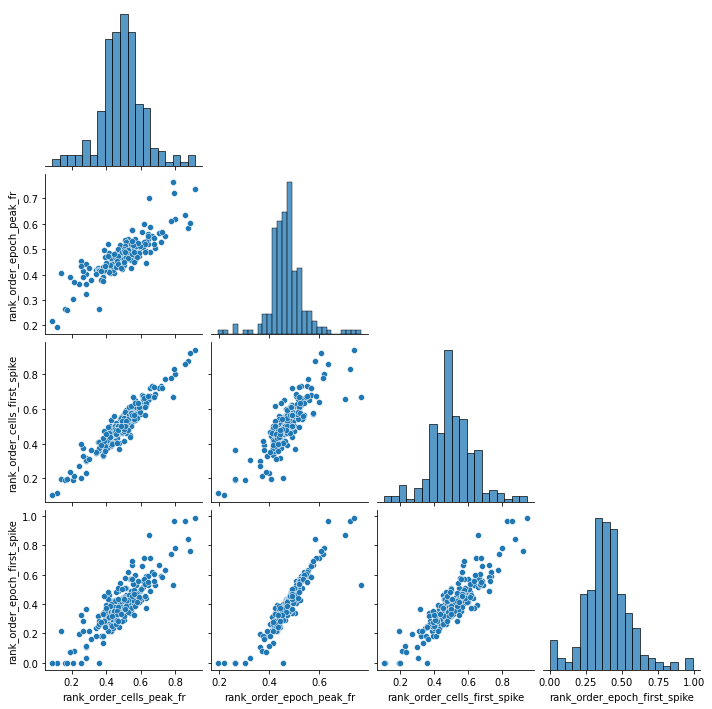

In [8]:
df = pd.DataFrame()
df['rank_order_cells_peak_fr'] = rank_order_m_cells_peak_fr
df['rank_order_epoch_peak_fr'] = rank_order_m_epoch_peak_fr
df['rank_order_cells_first_spike'] = rank_order_m_cells_first_spike
df['rank_order_epoch_first_spike'] = rank_order_m_epoch_first_spike

sns.pairplot(df, corner=True)
